# **Plot skin friction *Cf* to find the best blending exponent**

"gammaWall" and "gammaFace" are the exponent of "U_tilde" and "(1 - U_tilde)" for modification of skin friction. In order for the best blending exponent to be discovered, the skin friction of the following 4 cases are to be investigated.

1. gammaWall = 1.0, gammaFace = 0.5

2. gammaWall = 1.0, gammaFace = 2.0

3. gammaWall = 0.5, gammaFace = 1.0

4. gammaWall = 2.0, gammaFace = 1.0

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_face1 = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaFace0.5_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_face1 = [pd.read_csv(tauw_path_face1[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_face1[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.850502,0.239919,0.000012,0.000003,1.955243e+06,54670.165152,-1.054992e-05,2.376074e+06,256222.755771,...,2.020856e+06,2.569897e+05,58.578787,0.338538,64.894038,0.483763,78.479358,77.573255,0.014802,0.873174
1,0.001458,0.978189,1.060372,0.000014,0.000015,1.769619e+06,847377.220513,8.379568e-07,1.831016e+06,494485.365567,...,1.791080e+06,8.997936e+05,45.139946,0.420338,57.329460,0.613898,58.563730,58.287150,0.014802,0.667918
2,0.002433,1.048848,1.008619,0.000015,0.000014,1.479864e+06,847257.452098,1.196316e-07,1.342359e+06,638213.661616,...,1.407931e+06,1.053526e+06,33.093154,0.303962,48.826405,0.504588,29.183898,29.367207,0.014802,0.483901
3,0.003410,1.046737,1.172183,0.000015,0.000016,1.194397e+06,696035.815502,2.389894e-06,1.062836e+06,674223.864118,...,1.112509e+06,9.634203e+05,26.203003,0.093396,42.824612,0.247846,10.119438,10.470620,0.014802,0.378639
4,0.004390,1.044066,1.493110,0.000014,0.000021,1.145234e+06,648382.661748,6.844365e-06,1.021189e+06,624824.724933,...,1.066189e+06,8.939171e+05,25.176312,-0.070406,40.580524,0.013227,12.243941,12.524958,0.014802,0.362956


In [4]:
tauw_path_face2 = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaFace2.0_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_face2 = [pd.read_csv(tauw_path_face2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_face2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.844515,0.213317,0.000012,0.000003,1.965145e+06,32954.869772,-0.000011,2.402829e+06,237813.486687,...,2.029225e+06,173982.515121,59.238935,0.233125,65.100837,0.349531,76.576401,76.129600,0.014802,0.883249
1,0.001458,0.902525,4.331686,0.000013,0.000060,1.881366e+06,847377.220627,0.000046,2.155753e+06,288298.561093,...,1.945621e+06,215551.857298,53.147453,0.234740,60.254543,0.329232,63.023855,63.254578,0.014802,0.790206
2,0.002433,0.946061,4.527498,0.000013,0.000063,1.817069e+06,847377.220627,0.000049,1.968905e+06,274783.452489,...,1.862704e+06,210976.975165,48.540959,0.210945,55.315059,0.286068,54.439857,54.615601,0.014802,0.719844
3,0.003410,0.990102,4.348287,0.000014,0.000060,1.752025e+06,847377.220254,0.000046,1.779886e+06,260628.863195,...,1.762270e+06,218769.597010,43.880906,0.197975,50.306118,0.263697,49.231699,49.319704,0.014802,0.648664
4,0.004390,1.025829,4.269300,0.000014,0.000059,1.670907e+06,847377.184773,0.000045,1.598198e+06,247786.853890,...,1.639479e+06,238194.592786,39.401575,0.185179,45.510255,0.241758,42.318846,42.395201,0.014802,0.580244


In [5]:
tauw_path_wall1 = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaWall0.5_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall1 = [pd.read_csv(tauw_path_wall1[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall1[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,1.176568,0.635889,0.000016,0.000009,1.934272e+06,131836.629006,-0.000005,2.319408e+06,253282.593526,...,2.728941e+06,231903.085516,57.180924,0.454818,63.423246,0.617175,97.737617,96.639590,0.014802,0.851835
1,0.001458,1.431201,1.514426,0.000020,0.000021,1.691274e+06,847377.209893,0.000007,1.643905e+06,514749.436792,...,2.352758e+06,653126.130069,40.525863,0.493022,53.214424,0.722815,66.443749,66.233443,0.014802,0.597456
2,0.002433,1.483676,1.472046,0.000021,0.000020,1.264080e+06,756450.550055,0.000007,1.127718e+06,631864.198649,...,1.673168e+06,706539.229113,27.801525,0.263138,43.378034,0.477974,25.979055,26.340085,0.014802,0.403072
3,0.003410,1.461980,1.866381,0.000020,0.000026,1.059068e+06,559162.440709,0.000012,9.492860e+05,605935.590474,...,1.387837e+06,574935.717552,23.403712,0.009381,38.341886,0.140234,11.752651,12.175326,0.014802,0.335879
4,0.004390,1.469132,2.512943,0.000020,0.000035,1.109059e+06,611474.041047,0.000021,9.907181e+05,508444.087307,...,1.455496e+06,575212.869815,24.425035,-0.084520,36.960097,-0.027935,24.389235,24.599999,0.014802,0.351482


In [6]:
tauw_path_wall2 = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaWall2.0_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall2 = [pd.read_csv(tauw_path_wall2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.644973,0.043192,0.000009,5.994994e-07,2.008147e+06,6503.009013,-0.000013,2.493579e+06,192979.916158,...,1.608291e+06,171690.204684,61.476403,0.201914,66.233367,0.287299,51.464709,51.037974,0.014802,0.917424
1,0.001458,0.581424,2.169953,0.000008,3.011894e-05,1.907134e+06,807233.302223,0.000016,2.246081e+06,293118.941231,...,1.305926e+06,397016.639121,55.374506,0.211552,62.600674,0.286787,38.791135,38.877810,0.014802,0.824222
2,0.002433,0.553971,1.955460,0.000008,2.714178e-05,1.852288e+06,847377.220633,0.000013,2.071254e+06,329211.120230,...,1.147414e+06,466109.095467,51.064426,0.173927,59.180573,0.235041,31.060451,31.211404,0.014802,0.758386
3,0.003410,0.538003,1.835247,0.000007,2.547322e-05,1.803125e+06,847377.220619,0.000012,1.928384e+06,344510.186592,...,1.037477e+06,502888.626084,47.542207,0.137457,56.035591,0.192213,28.547180,28.657727,0.014802,0.704584
4,0.004390,0.529829,1.796097,0.000007,2.492982e-05,1.760990e+06,847377.220423,0.000011,1.805940e+06,351060.121600,...,9.568400e+05,528964.152403,44.523567,0.103156,53.178468,0.152734,27.055469,27.144533,0.014802,0.658475


In [7]:
x0 = 0
Rex = (tauw_data_face1[0]['ccx'] - x0)*UInf/nuInf
Cf_face1 = [tauw_data_face1[i + len(res_list)*j]['nuEff_wall']*tauw_data_face1[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_face2 = [tauw_data_face2[i + len(res_list)*j]['nuEff_wall']*tauw_data_face2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall1 = [tauw_data_wall1[i + len(res_list)*j]['nuEff_wall']*tauw_data_wall1[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wall2 = [tauw_data_wall2[i + len(res_list)*j]['nuEff_wall']*tauw_data_wall2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

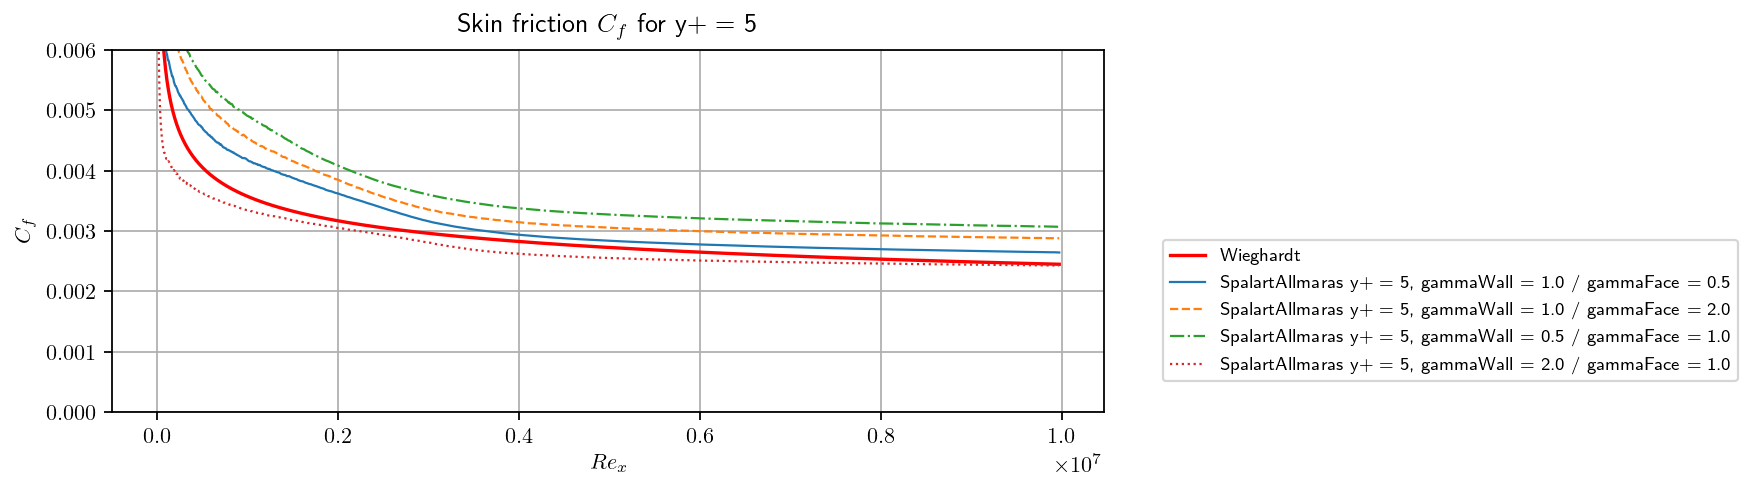

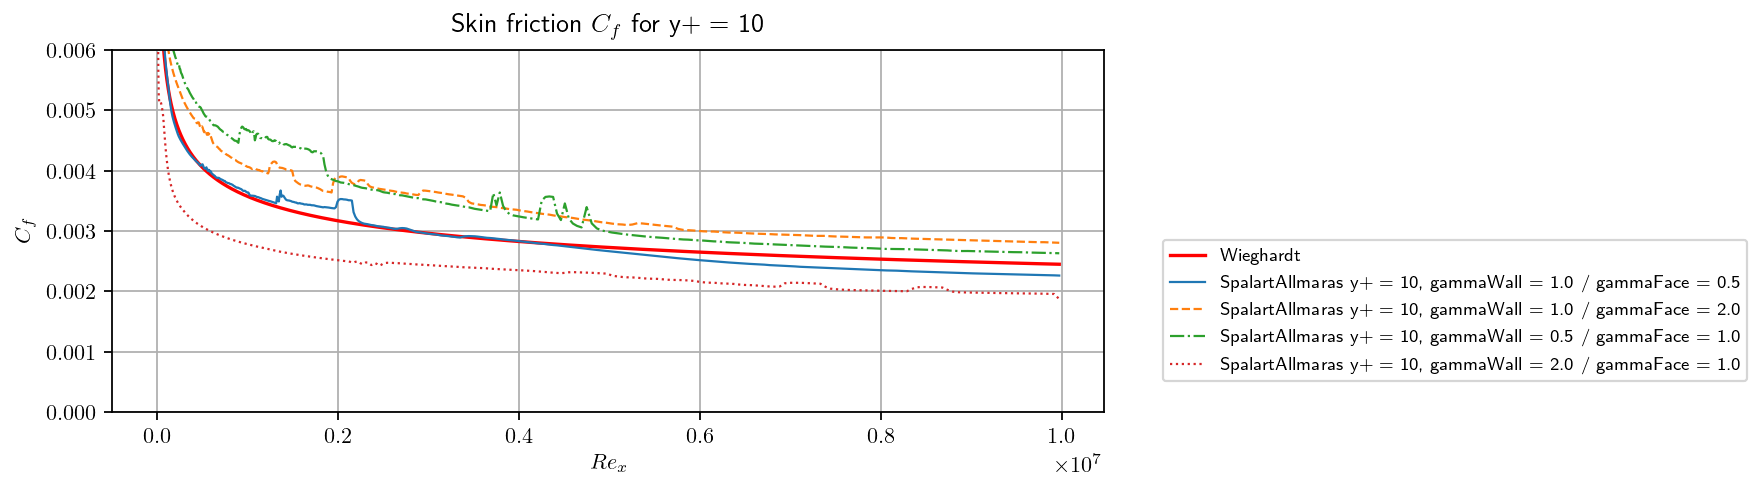

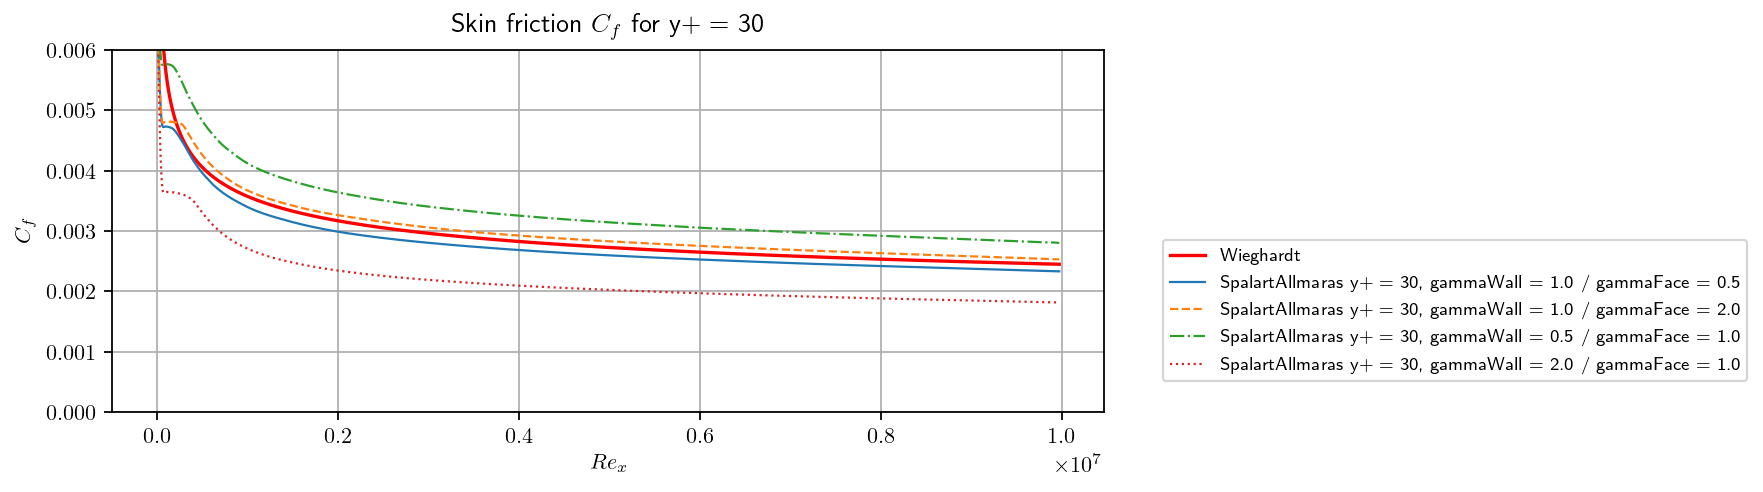

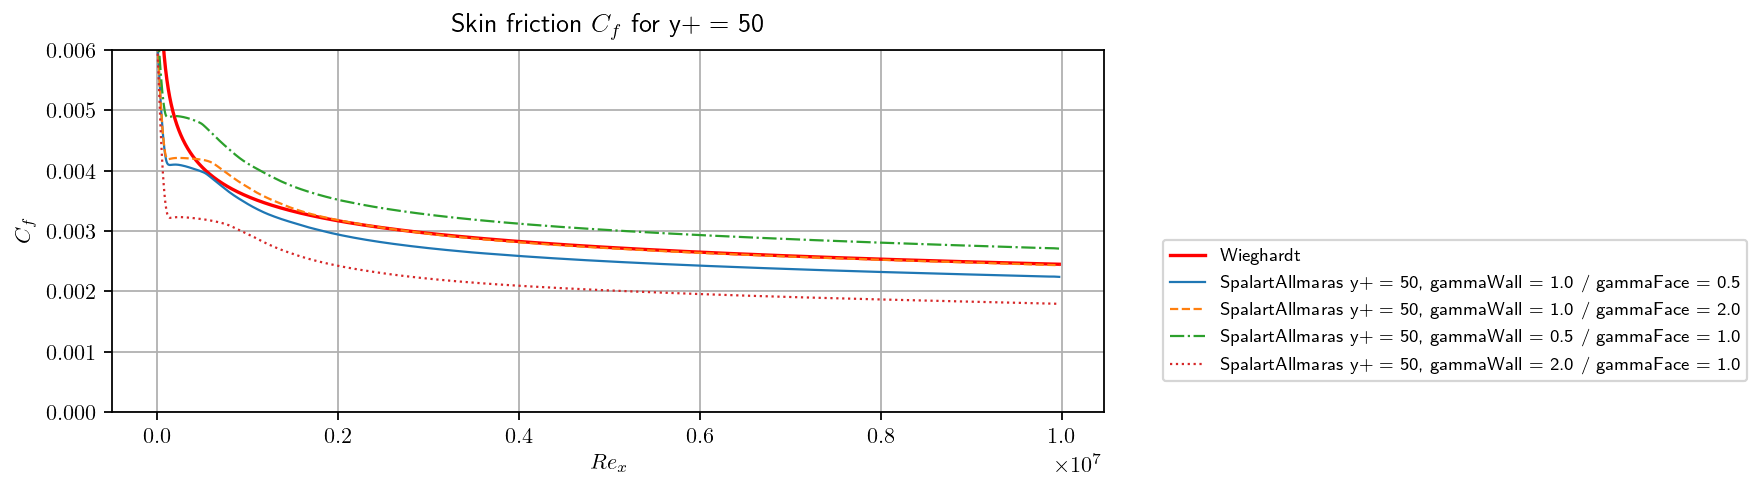

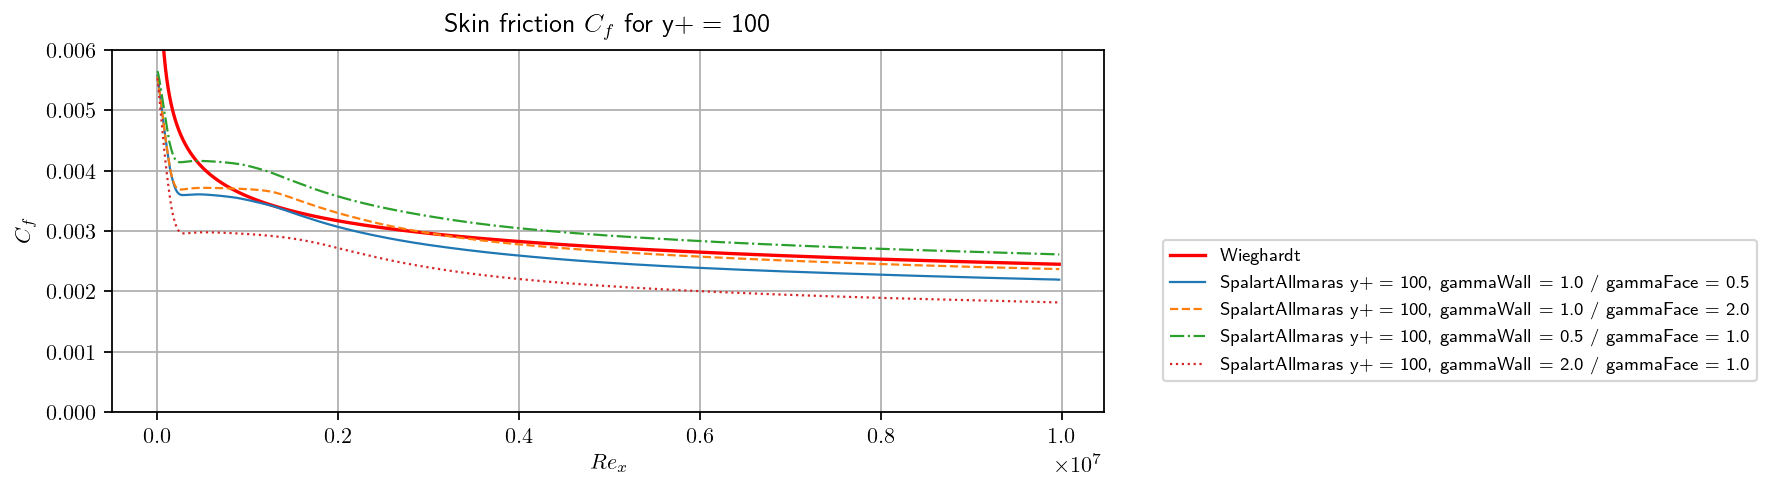

In [20]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_face1[i + len(res_list)*j], label = "{} y+ = {}, gammaWall = 1.0 / gammaFace = 0.5".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_face2[i + len(res_list)*j], label = "{} y+ = {}, gammaWall = 1.0 / gammaFace = 2.0".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_wall1[i + len(res_list)*j], label = "{} y+ = {}, gammaWall = 0.5 / gammaFace = 1.0".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_wall2[i + len(res_list)*j], label = "{} y+ = {}, gammaWall = 2.0 / gammaFace = 1.0".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))

### Comparison *Cf* of 4 cases for different *y+*

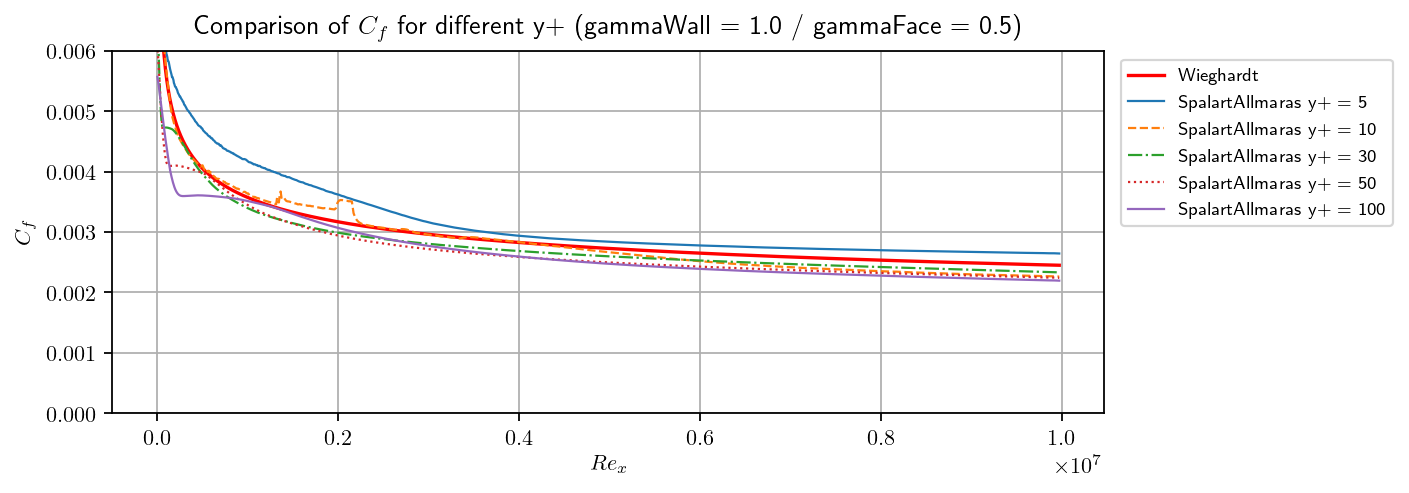

In [21]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 1.0 / gammaFace = 0.5)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_face1[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

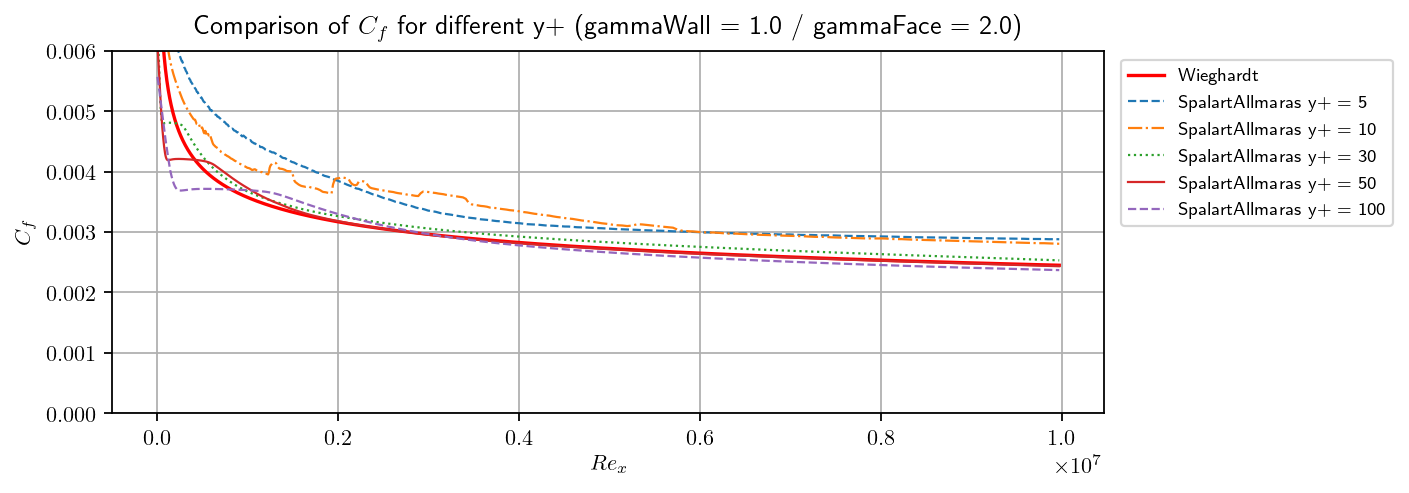

In [22]:
fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 1.0 / gammaFace = 2.0)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_face2[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

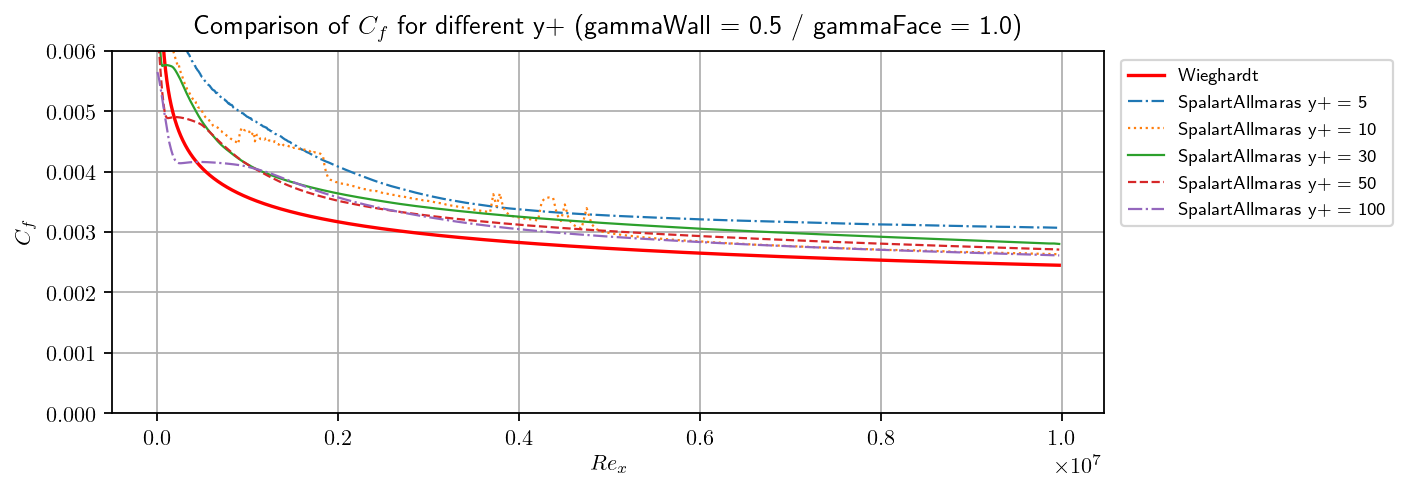

In [23]:
fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax4.set_xlabel(r"$Re_x$")
ax4.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 0.5 / gammaFace = 1.0)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_wall1[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax4.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

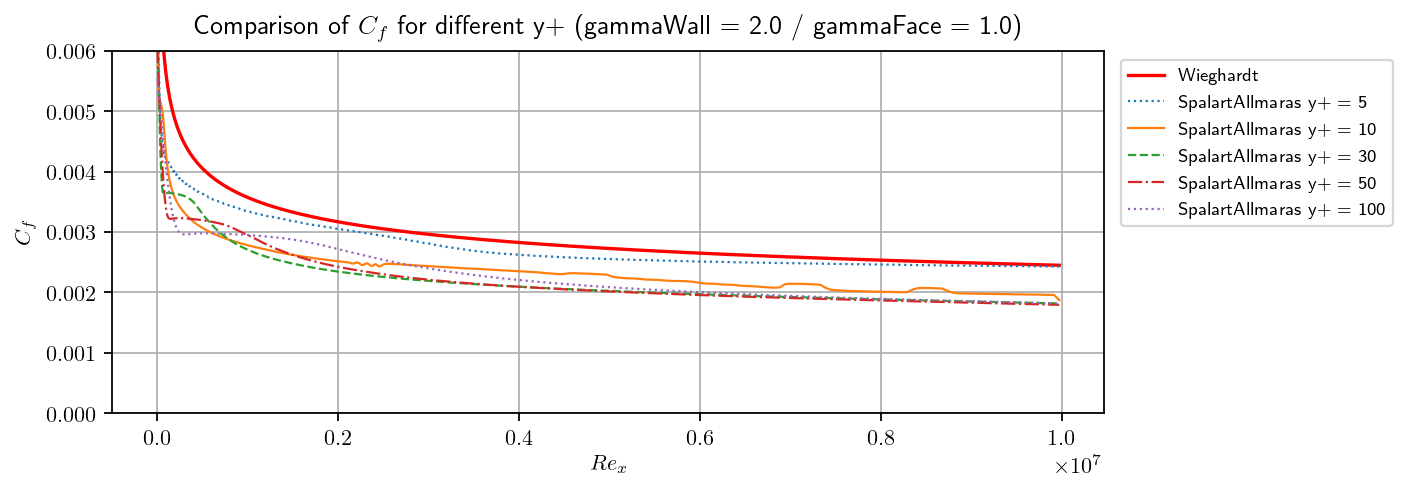

In [24]:
fig5, ax5 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax5.set_xlabel(r"$Re_x$")
ax5.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 2.0 / gammaFace = 1.0)")
ax5.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax5.plot(Rex, Cf_wall2[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax5.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

### Results

According to the above plots, it is obvious that the skin friction generally increases when "gammaFace" increases, whereas the skin friction increases when "gammaWall" decreases. When it comes to the skin friction values at y+ = 5 and 10, they are quite different from the other y+ values. However, the difference amongst all y+ values are smaller when "gammaFace" and "gammaWall" are getting smaller. Therefore, the blending model with ```gammaWall = 0.8, gammaFace = 0.7``` is selected. For comparison, the skin fiction of the model with ```gammaWall = 0.95, gammaFace = 1.5``` is also plotted here.

In [14]:
tauw_path_comp = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaWall0.95Face1.5_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_comp = [pd.read_csv(tauw_path_comp[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_comp[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.869055,0.261646,0.000012,0.000004,1.958965e+06,45396.712555,-0.000010,2.386128e+06,246758.211654,...,2.073677e+06,195276.372258,58.827027,0.271671,64.909301,0.397768,78.565420,77.941279,0.014802,0.876960
1,0.001458,0.958407,2.712601,0.000013,0.000038,1.841598e+06,847377.220633,0.000024,2.040188e+06,359503.808740,...,1.955329e+06,344176.873398,50.297814,0.318457,59.160160,0.442458,62.847912,62.862704,0.014802,0.746687
2,0.002433,1.037204,2.364145,0.000014,0.000033,1.730525e+06,847377.219157,0.000019,1.721799e+06,421980.717565,...,1.785857e+06,406929.845797,42.448378,0.273732,52.851206,0.393728,47.576958,47.736797,0.014802,0.626789
3,0.003410,1.084720,2.387785,0.000015,0.000033,1.614101e+06,847375.780844,0.000019,1.479120e+06,428997.093599,...,1.604432e+06,440411.854992,36.465793,0.185077,47.041793,0.288089,36.719573,36.937881,0.014802,0.535402
4,0.004390,1.085948,2.671382,0.000015,0.000037,1.473559e+06,847226.089369,0.000023,1.335936e+06,391448.491412,...,1.450757e+06,450646.937820,32.936053,0.096566,42.586543,0.171124,30.547716,30.757145,0.014802,0.481483


In [15]:
tauw_path_best = [run + 'flatPlate_revBlending/turbulentFlatPlate_1stface_gammaWall0.8Face0.7_500iter/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_best = [pd.read_csv(tauw_path_best[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_best[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,magGradU_face,...,wall_blending,face_blending,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,0.957531,0.418307,0.000013,0.000006,1.940929e+06,99063.826240,-0.000008,2.337395e+06,272010.402907,...,2.238129e+06,267434.157773,57.624974,0.370794,64.329201,0.531339,85.470722,84.494295,0.014802,0.858608
1,0.001458,1.139065,1.228260,0.000016,0.000017,1.742804e+06,847377.219929,0.000003,1.753090e+06,510332.998767,...,1.996883e+06,794590.049570,43.218449,0.441360,55.798453,0.651458,61.555355,61.315840,0.014802,0.638573
2,0.002433,1.205424,1.201189,0.000017,0.000017,1.395435e+06,844735.445711,0.000003,1.257012e+06,640751.228486,...,1.515232e+06,922727.493680,30.989065,0.286457,46.784791,0.494216,28.065851,28.322090,0.014802,0.451761
3,0.003410,1.194963,1.391733,0.000017,0.000019,1.137921e+06,640340.201483,0.000005,1.015029e+06,653810.530350,...,1.212923e+06,788382.167873,25.024496,0.052326,41.142898,0.197642,10.681588,11.072661,0.014802,0.360637
4,0.004390,1.196281,1.904033,0.000017,0.000026,1.152404e+06,656056.242730,0.000013,1.027229e+06,573075.321125,...,1.228854e+06,760418.668117,25.325199,-0.078644,39.453623,-0.006281,17.480651,17.732548,0.014802,0.365231


In [16]:
Cf_comp = [tauw_data_comp[i + len(res_list)*j]['nuEff_wall']*tauw_data_comp[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_best = [tauw_data_best[i + len(res_list)*j]['nuEff_wall']*tauw_data_best[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

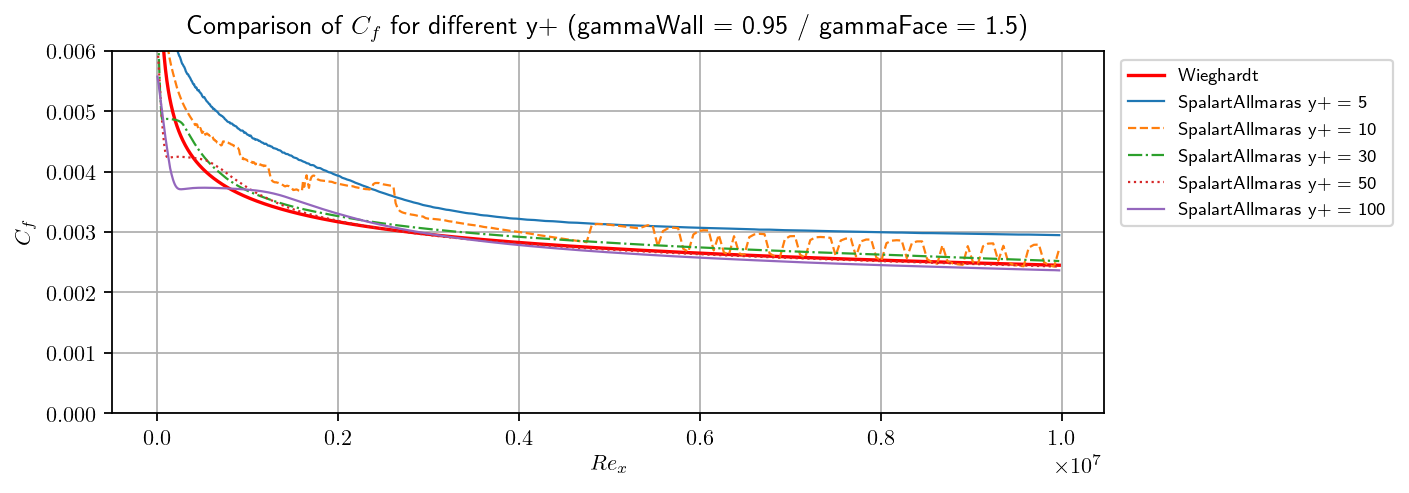

In [25]:
fig6, ax6 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax6.set_xlabel(r"$Re_x$")
ax6.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 0.95 / gammaFace = 1.5)")
ax6.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax6.plot(Rex, Cf_comp[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax6.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))

### The best blending model

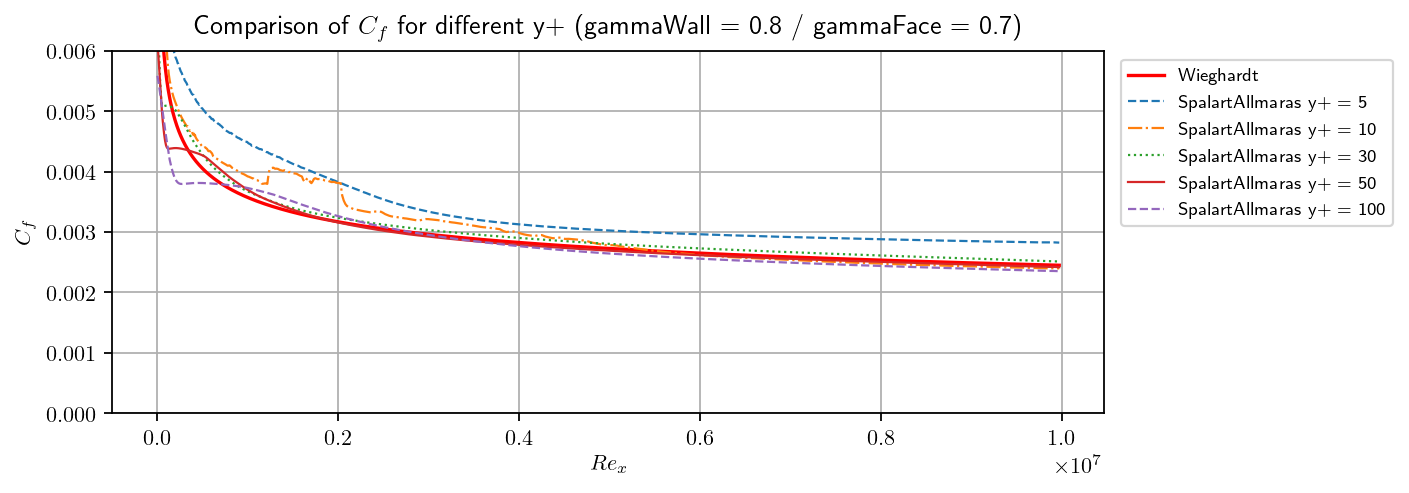

In [26]:
fig7, ax7 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.006])
plt.grid()
ax7.set_xlabel(r"$Re_x$")
ax7.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ for different y+ (gammaWall = 0.8 / gammaFace = 0.7)")
ax7.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax7.plot(Rex, Cf_best[i + len(res_list)*j], label = "{} y+ = {}".format(model_sa, yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax7.legend(fontsize = 8, bbox_to_anchor=(1.3, 1))